In [2]:
# REinstalled numpy
# pip uninstall numpy
import numpy
import scipy
#import numpy
import matplotlib
import pandas
import sklearn
import pydot
import h5py

import tensorflow
import keras

print('scipy ' + scipy.__version__)
print('numpy ' + numpy.__version__)
print('matplotlib ' + matplotlib.__version__)
print('pandas ' + pandas.__version__)
print('sklearn ' + sklearn.__version__)
print('pydot ' + pydot.__version__)
print('h5py ' + h5py.__version__)

#print('theano ' + theano.__version__)
print('tensorflow ' + tensorflow.__version__)
print('keras ' + keras.__version__)


scipy 1.2.0
numpy 1.16.0
matplotlib 3.0.2
pandas 0.23.4
sklearn 0.20.2
pydot 1.4.1
h5py 2.9.0
tensorflow 1.12.0
keras 2.2.2


In [3]:
import sys
sys.version

'3.5.6 |Anaconda, Inc.| (default, Aug 26 2018, 21:41:56) \n[GCC 7.3.0]'

In [4]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5, batch_size=32)

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('loss_and_metrics : ' + str(loss_and_metrics))


Epoch 1/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.6937 - acc: 0.8179
Epoch 2/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.3512 - acc: 0.9012
Epoch 3/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.3036 - acc: 0.9136
Epoch 4/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.2748 - acc: 0.9226
Epoch 5/5
10000/10000 [==============================] - 0s 21us/step
loss_and_metrics : [0.24314910253435373, 0.9304]


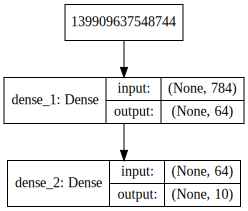

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [7]:
from keras.models import load_model

model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')
